In [89]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
train

testt = pd.read_csv('test.csv')
testt['color'] = pd.factorize(testt['color'])[0]
testt
df3 = testt[['color', 'carat', 'x', 'y', 'z']]
df3

,color,carat,x,y,z
0,0,0.35,4.51,4.54,2.82
1,1,0.77,5.83,5.87,3.68
2,2,0.71,5.77,5.74,3.55
3,3,0.33,4.44,4.42,2.73
4,2,1.20,6.75,6.79,4.24
...,...,...,...,...,...
129045,0,0.72,5.75,5.78,3.57
129046,0,0.70,5.77,5.74,3.43
129047,3,1.01,6.44,6.41,4.01
129048,0,1.35,7.05,7.08,4.38


In [75]:
train.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


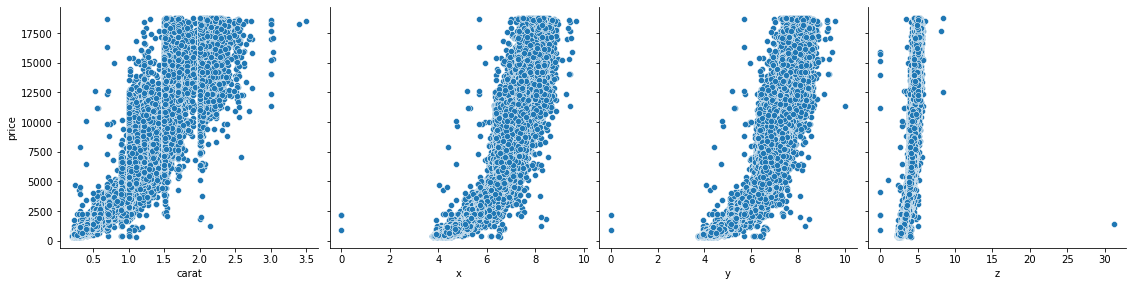

In [77]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(train, x_vars=['carat', 'x','y','z'], 
             y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

In [78]:
train['color'] = pd.factorize(train['color'])[0]
train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,0,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,1,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,2,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,2,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,2,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,4,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,2,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,0,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,4,SI1,62.9,55.0,4.45,4.49,2.81,681


In [79]:
x1 = train['color']
x2 = train['carat']
x3 = train['x']
x4 = train['y']
x5 = train['z']
y =  train['price']


In [80]:
from sklearn.model_selection import train_test_split as tts

data = {'x1': x1, 'x2': x2,'x3': x3,'x4': x4,'x5': x5}
# print(data)
data1 = pd.DataFrame.from_dict(data)
data_train, data_test, y_train, y_test = tts(data1,y,train_size = 0.95, test_size = 0.05, random_state = 100)


139455    13052
96962       855
45948       956
141236     6355
165348     1755
          ...  
82270       874
65615      2347
77655      5944
56088       524
38408      1061
Name: price, Length: 183894, dtype: int64

In [81]:
import statsmodels.api as sm

# Adding a constant to get an intercept
data_train_sm = sm.add_constant(data_train)
data_train_sm

,const,x1,x2,x3,x4,x5
139455,1.0,6,1.60,7.52,7.56,4.64
96962,1.0,4,0.40,4.76,4.73,2.93
45948,1.0,3,0.34,4.48,4.51,2.74
141236,1.0,2,1.10,6.64,6.71,4.12
165348,1.0,3,0.57,5.26,5.31,3.32
...,...,...,...,...,...,...
82270,1.0,2,0.35,4.52,4.48,2.81
65615,1.0,0,0.70,5.73,5.69,3.49
77655,1.0,6,1.23,6.83,6.86,4.27
56088,1.0,2,0.30,4.26,4.28,2.70


In [82]:
lr = sm.OLS(y_train, data_train_sm).fit()
lr.params

const     6951.857575
x1         -95.429198
x2       13910.436420
x3       -2004.414037
x4         427.985265
x5       -1329.333523
dtype: float64

In [83]:
y_train_pred = lr.predict(data_train_sm)
res = (y_train - y_train_pred)
res

139455    2421.751844
96962      132.272385
45948      252.816831
141236     206.902952
165348    -155.515366
             ...     
82270      122.352734
65615     -652.732800
77655    -1114.696084
56088     -113.902729
38408       38.029300
Length: 183894, dtype: float64

In [84]:
data_test_sm = sm.add_constant(data_test)

y_test_pred = lr.predict(data_test_sm)
y_test_pred

3033       5343.803499
136642     9900.892211
190247     6230.272299
20099       684.531276
90239       722.206375
              ...     
79921        80.871596
87900      2924.487977
17181     10152.088730
20192       752.726651
28280      6916.615325
Length: 9679, dtype: float64

In [85]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9127130492630926

In [116]:
df3_sm = sm.add_constant(df3)
y_test_final = lr.predict(df3_sm)
y_test_final = pd.DataFrame(y_test_final)

y_test_final[0]

fdf = pd.DataFrame(columns = ['id', 'price'])
fdf['id'] = testt['id']
fdf['price'] = y_test_final[0]


fdf = fdf.set_index('id')
fdf

,price
id,
193573,974.935583
193574,3502.056725
193575,2809.441458
193576,619.030028
193577,7193.373945
...,...
322618,3170.025239
322619,3020.715513
322620,5219.442488


In [117]:
fdf.to_csv('submission.csv')